# SPAM NEWS DETECTION 

The objective of this project is to develop a robust spam news detection system that effectively identifies and classifies news articles as either spam or legitimate based on their content. By leveraging advanced natural language processing (NLP) techniques and machine learning and deep learning models. 


# News Data Fetching Script using MediaStack API

This script retrieves news articles from the MediaStack API for a specified query and date range. It utilizes Python's `requests` library to interact with the API and fetch the articles, which are then saved into a CSV file for further analysis.

## Components of the Script

### 1. Importing Required Libraries

- **requests**: A library to make HTTP requests to the MediaStack API.
- **pandas**: A powerful data manipulation library that will be used to handle the fetched articles and save them into a CSV file.

### 2. API Configuration

- **API_KEY**: Your unique API key required to authenticate requests to the MediaStack API.
- **BASE_URL**: The endpoint for fetching news articles from the API.

### 3. Function to Fetch News Data

- **Purpose**: This function sends a GET request to the MediaStack API to fetch news articles based on the provided parameters.
- **Parameters**:
  - **api_key**: Your API key for authentication.
  - **query**: The keywords to search for in the news articles.
  - **start_date** and **end_date**: The date range for fetching articles.
  - **languages**: The language of the articles (default is English).
  - **limit**: The maximum number of articles to return (default is 100).
  - **offset**: The number of articles to skip for pagination.
- **Returns**: JSON response containing articles or an error message.

### 4. Function to Fetch Articles for a Specified Period

- **Purpose**: This function retrieves articles for each year in the specified range and aggregates them into a single list.
- **Parameters**:
  - **api_key**: Your API key for authentication.
  - **query**: The keywords to search for in the news articles.
  - **start_year** and **end_year**: The range of years for which articles are to be fetched.
- **Process**:
  - It iterates through each year, fetching articles until no more are available (less than 100 articles returned indicates the end of available data).
  
### 5. Fetching News Articles

- The script fetches news articles from 2021 to 2024 by calling the function with the specified parameters.

### 6. Saving Data to CSV

- The list of articles is converted into a DataFrame using pandas, which is then saved to a CSV file named `mediastack_news_articles_2021_2024.csv` for further analysis.
- The total number of articles fetched is printed to confirm the operation's success.


In [77]:
import requests
import pandas as pd

API_KEY = 'Use your API_Key'
BASE_URL = 'http://api.mediastack.com/v1/news'

def fetch_news_data(api_key, query, start_date, end_date, languages='en', limit=100, offset=0):
    params = {
        'access_key': api_key,
        'keywords': query,
        'languages': languages,
        'date': f'{start_date},{end_date}',
        'limit': limit,
        'offset': offset
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

def fetch_articles_for_period(api_key, query, start_year, end_year):
    all_articles = []
    
    for year in range(start_year, end_year + 1):
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        print(f"Fetching articles for {year}...")
        
        offset = 0
        while True:
            data = fetch_news_data(api_key, query, start_date, end_date, offset=offset)
            if not data or 'data' not in data:
                break
            
            articles = data['data']
            all_articles.extend(articles)
            if len(articles) < 100:  # Less than 100 articles means it's the last page
                break
            
            offset += 100

    return all_articles

# Fetching news articles from 2021 to 2024
articles = fetch_articles_for_period(API_KEY, 'news', 2021, 2024)

# Convert the list of articles to a DataFrame and save to CSV
df = pd.DataFrame(articles)
df.to_csv('mediastack_news_articles_2021_2024.csv', index=False)
print(f"Saved {len(articles)} articles to 'mediastack_news_articles_2021_2024.csv'")


Fetching articles for 2021...
Fetching articles for 2022...
Fetching articles for 2023...
Fetching articles for 2024...
Error: 422
Saved 10000 articles to 'mediastack_news_articles_2021_2024.csv'


In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') 


# Loading the dataset
df = pd.read_csv('mediastack_news_articles_2021_2024.csv')

# Basic information about dataset
print(df.info())

# Showing first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        7787 non-null   object
 1   title         10000 non-null  object
 2   description   9999 non-null   object
 3   url           10000 non-null  object
 4   source        10000 non-null  object
 5   image         3807 non-null   object
 6   category      10000 non-null  object
 7   language      10000 non-null  object
 8   country       10000 non-null  object
 9   published_at  10000 non-null  object
dtypes: object(10)
memory usage: 781.4+ KB
None
               author                                              title  \
0         Leon Usigbe  Cost-cutting measures drive infrastructure gro...   
1       Page Six Team  Taylor Swift live updates: The latest from The...   
2                 NaN  Leicester City vs Nottingham Forest - Premier ...   
3  Vincent Bonsignore   Raiders mail

In [2]:
# Checking for duplicates in title & url columns
duplicate_titles = df[df.duplicated(subset='title')]
duplicate_urls = df[df.duplicated(subset='url')]

# Displaying number of duplicates
print(f"Duplicate titles: {duplicate_titles.shape[0]}")
print(f"Duplicate URLs: {duplicate_urls.shape[0]}")

# Removing duplicates
df_cleaned = df.drop_duplicates(subset='title')
df_cleaned = df_cleaned.drop_duplicates(subset='url')

# Displaying number of entries after removing duplicates
print(f"Entries after removing duplicates: {df_cleaned.shape[0]}")


Duplicate titles: 1190
Duplicate URLs: 27
Entries after removing duplicates: 8810


In [3]:
# Displaying missing values 
print(df_cleaned.isnull().sum())

# Dropping rows with missing descriptions
df_cleaned = df_cleaned.dropna(subset=['description'])

# For 'author' and 'image', filling missing values with placeholders
df_cleaned['author'].fillna('Unknown', inplace=True)
df_cleaned['image'].fillna('No Image', inplace=True)

# Displaying missing values after handling them
print(df_cleaned.isnull().sum())


author          1864
title              0
description        1
url                0
source             0
image           5853
category           0
language           0
country            0
published_at       0
dtype: int64
author          0
title           0
description     0
url             0
source          0
image           0
category        0
language        0
country         0
published_at    0
dtype: int64


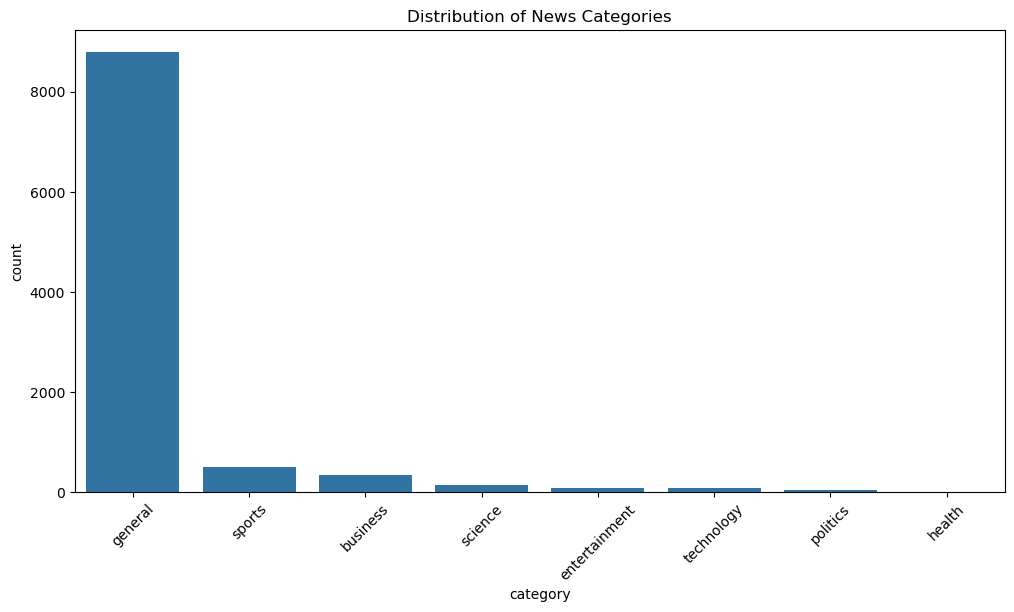

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.show()


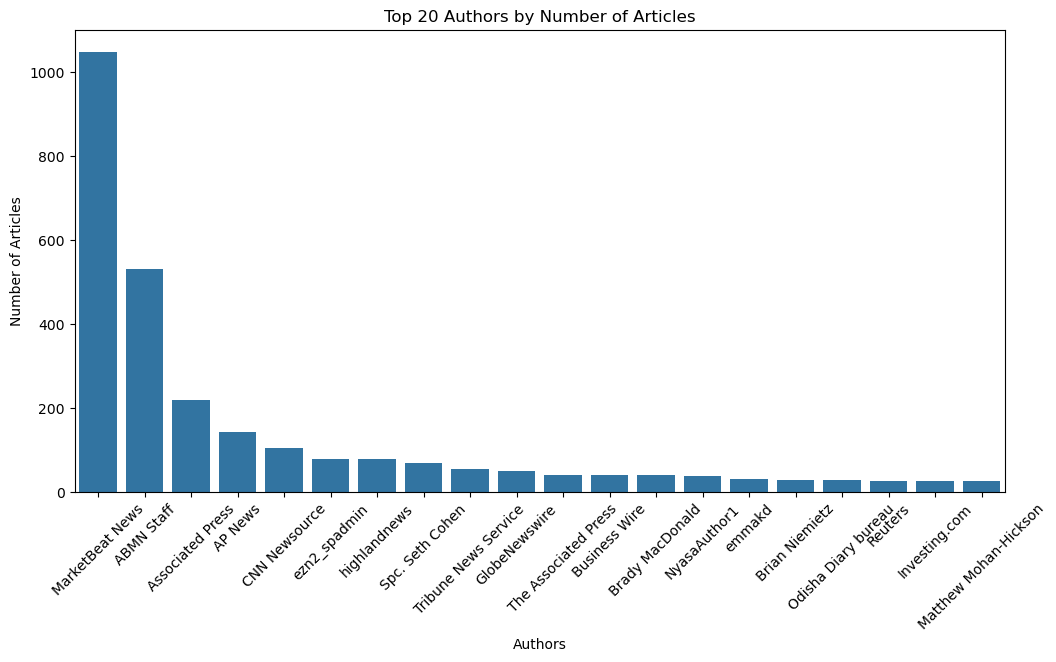

In [5]:
# Top 20 authors by number of articles
top_authors = df['author'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top 20 Authors by Number of Articles')
plt.xlabel('Authors')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


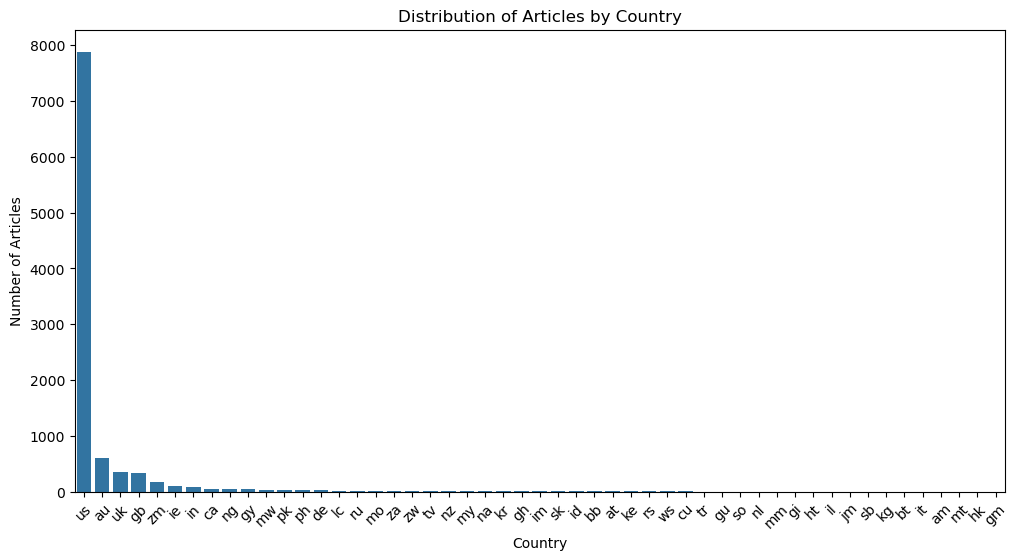

In [6]:
# Distribution of articles by country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Distribution of Articles by Country')
plt.xlabel('Country')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


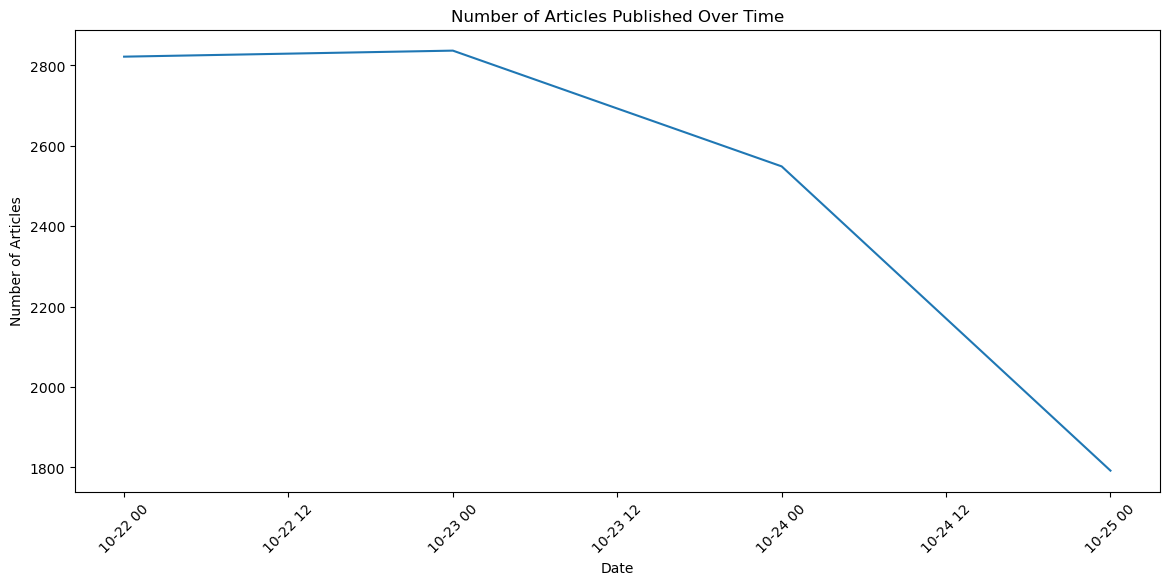

In [7]:
# Converting 'published_at' to datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# Extracting date for visualization
df['date'] = df['published_at'].dt.date
articles_per_day = df['date'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
articles_per_day.plot(kind='line')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


# Spam Detection Using Keyword Matching

In the realm of email filtering and content moderation, identifying spam is a critical task. The following technique employs keyword matching to label content as spam or not spam based on predefined spam-related keywords.

## 1. Defining Spam-Related Keywords
A list of keywords that are commonly associated with spam content is created. These keywords are phrases or words that, when found in text, often indicate that the content may be spammy. Examples of such keywords include:

- **click here**: Often used in spam emails to entice recipients to click on malicious links.
- **free**: Commonly used to lure recipients with offers that may not be legitimate.
- **limited time**: Creates a sense of urgency, pressuring recipients to act quickly.
- **win**, **congratulations**: Frequently found in lottery or prize scams.
- **exclusive offer**, **urgent**, **act now**: Phrases that push the recipient to respond immediately.
- **100% guarantee**, **buy now**, **ends soon**, **offer**, **deal ends soon**: Marketing tactics often used in spam to create urgency or promise unrealistic results.

## 2. Function to Check for Spam
The `is_spam()` function is defined to determine whether a given text contains any of the defined spam keywords. 

- **Input Validation**: The function first checks if the input is a string. If not, it returns `0`, indicating that the text is not spam.
- **Keyword Matching**: The function iterates through the list of spam keywords and checks for their presence in the text. 
  - To ensure that the matching is case-insensitive, the text is converted to lowercase using the `lower()` method.
- **Return Values**: If any spam keyword is found, the function returns `1`, labeling the text as spam. If no keywords are found, it returns `0`, indicating that the text is not spam.

## 3. Applying the Spam Detection Function
The `is_spam()` function is applied to the DataFrame `df` to label the content of the `title` and `description` columns. 

- The `apply()` method is used with a lambda function that checks both the `title` and `description` for spam content. 
- The result is stored in a new column named `spam`, which will contain `1` for spam and `0` for non-spam.

## 4. Checking Spam Distribution
To understand the effectiveness of the spam detection mechanism, the distribution of spam and non-spam labels is displayed using `value_counts()`. This provides insight into how many entries have been classified as spam versus not spam.

## 5. Displaying Examples
The first 10 entries of the DataFrame, including the original `title`, `description`, and the `spam` label, are displayed. This allows for a quick review of how well the spam detection mechanism is working.

By employing this simple yet effective keyword matching technique, it becomes possible to identify spam content based on common patterns and phrases, assisting in filtering and moderation tasks in various applications.


In [8]:
# Defining spam-related keywords
spam_keywords = [
    'click here', 'free', 'limited time', 'win', 'congratulations', 
    'exclusive offer', 'urgent', 'act now', '100% guarantee', 'buy now', 'ends soon', 'offer', 'deal ends soon'
]

# Function to check if a text contains spam keywords
def is_spam(text):
    # Checking if the text is a string
    if isinstance(text, str):
        for keyword in spam_keywords:
            if keyword in text.lower():  # Using lower() for case-insensitive matching
                return 1  # Label as spam
    return 0  # Label as not spam

# Applying function to title & description columns
df['spam'] = df.apply(lambda x: is_spam(x['title']) or is_spam(x['description']), axis=1)

# Checking distribution of spam and not spam labels
print(df['spam'].value_counts())

# Displaying some examples
print(df[['title', 'description', 'spam']].head(10))


spam
0    6980
1    3020
Name: count, dtype: int64
                                               title  \
0  Cost-cutting measures drive infrastructure gro...   
1  Taylor Swift live updates: The latest from The...   
2  Leicester City vs Nottingham Forest - Premier ...   
3   Raiders mailbag: Is Ridder going to start at QB?   
4  Tractor Supply (NASDAQ:TSCO) Given New $270.00...   
5  New deep ultraviolet micro-LED array advances ...   
6  Odds of a Trump Victory Soar Past 60% on Betti...   
7  Leicester City vs Nottingham Forest - Premier ...   
8  Optical technique that uses orbital angular mo...   
9  Nicole Scherzinger says she is 'heartbroken' o...   

                                         description  spam  
0  Tribune OnlineCost-cutting measures drive infr...     0  
1  Page Six gives you the daily lowdown on everyt...     0  
2  Follow Mail Sport's live coverage to be kept u...     0  
3  Raiders fans submitted questions about coach A...     0  
4  Mizuho boosted their tar

# Text Preprocessing Techniques

Text preprocessing is a crucial step in natural language processing (NLP) that transforms raw text into a clean and structured format suitable for analysis or model training. The following techniques are commonly used in text preprocessing:

## 1. Removing URLs
URLs are web addresses that can clutter the text and may not provide useful information for text analysis. Removing them helps in focusing on the core content of the text. The code uses a regular expression to identify and eliminate any URLs present in the text.

## 2. Removing Punctuation and Special Characters
Punctuation marks (e.g., ., !, ?, etc.) and special characters (e.g., @, #, $, etc.) can interfere with the analysis, especially in tasks like tokenization. Removing these characters simplifies the text, making it easier to analyze. The provided code uses a regular expression to replace non-word characters with spaces.

## 3. Lowercasing Letters
Converting all text to lowercase ensures that the same words in different cases (e.g., "Apple" and "apple") are treated as identical. This reduces redundancy and helps in normalizing the text data. In the code, the `lower()` method is used to convert the text to lowercase.

## 4. Tokenization
Tokenization is the process of splitting text into individual words or tokens. This step is essential for transforming text into a format that can be analyzed. Tokenization allows for the examination of word frequencies and relationships. The code utilizes the `word_tokenize()` function from the NLTK library to perform tokenization.

## 5. Removing Stopwords
Stopwords are common words (e.g., "and," "the," "is," etc.) that usually do not carry significant meaning and can be safely removed from the text. Eliminating stopwords helps in reducing the dimensionality of the data and focusing on more meaningful words. The code uses a predefined list of stopwords from the NLTK library to filter them out.

## 6. Joining Tokens Back to a Single String
After processing the text, the individual tokens are combined back into a single string. This step is useful for further analysis or for feeding the cleaned text into machine learning models. The code uses the `join()` method to concatenate the tokens with spaces.

## 7. Combining Title and Description
In the context of the provided code, the title and description fields are combined into a single text column called `combined_text`. This allows for a holistic analysis of the text content, leveraging both fields for better insights. The `fillna('')` method ensures that any missing values are treated as empty strings before concatenation.

## 8. Applying Cleaning Function
The `preprocess_text()` function is applied to the `combined_text` column of the DataFrame, generating a new column called `cleaned_text` that contains the processed text. This cleaned text is now ready for further analysis or model training.

## Displaying Results
Finally, the first 10 rows of the original title, description, and cleaned text are displayed to verify the preprocessing results.

By applying these preprocessing techniques, the text data becomes more manageable and meaningful, facilitating effective analysis and model training in NLP tasks.


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Defining the function to clean & preprocess text
def preprocess_text(text):
    if not isinstance(text, str):  # Checking if the input is a string
        return ''  # Return empty string for non-string inputs
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Removing punctuation and special characters
    text = re.sub(r'\W', ' ', text)
    # Converting text to lowercase
    text = text.lower()
    # Tokenizing  text
    tokens = word_tokenize(text)
    # Removing stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Joining tokens back to single string
    return ' '.join(tokens)

# Combining title & description for preprocessing
df['combined_text'] = df['title'].fillna('') + " " + df['description'].fillna('')

# Applying cleaning function to combined text column
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)

# Displaying first 10 rows of cleaned text
print(df[['title', 'description', 'cleaned_text']].head(10))


                                               title  \
0  Cost-cutting measures drive infrastructure gro...   
1  Taylor Swift live updates: The latest from The...   
2  Leicester City vs Nottingham Forest - Premier ...   
3   Raiders mailbag: Is Ridder going to start at QB?   
4  Tractor Supply (NASDAQ:TSCO) Given New $270.00...   
5  New deep ultraviolet micro-LED array advances ...   
6  Odds of a Trump Victory Soar Past 60% on Betti...   
7  Leicester City vs Nottingham Forest - Premier ...   
8  Optical technique that uses orbital angular mo...   
9  Nicole Scherzinger says she is 'heartbroken' o...   

                                         description  \
0  Tribune OnlineCost-cutting measures drive infr...   
1  Page Six gives you the daily lowdown on everyt...   
2  Follow Mail Sport's live coverage to be kept u...   
3  Raiders fans submitted questions about coach A...   
4  Mizuho boosted their target price on Tractor S...   
5  A team led by Prof. Sun Haiding from the Uni

In [10]:
# Features and target variable
X = df['cleaned_text']
y = df['spam']


In [11]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 8000
Test set size: 2000


# TF-IDF Vectorization

## Overview
Vectorization is the process of converting text data into numerical representations that can be used as input for machine learning algorithms. This is essential because most machine learning models operate on numerical data rather than raw text.

### What is TF-IDF?
TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents (corpus). The TF-IDF vectorization technique transforms text documents into a matrix of numerical values, where each entry corresponds to a word's importance in that document.

#### Components of TF-IDF:
1. **Term Frequency (TF):**
   - This measures how frequently a term appears in a document. The more times a word appears in a document, the higher its term frequency.
   - **Formula:** 
     - TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)

2. **Inverse Document Frequency (IDF):**
   - This measures how important a term is across the entire corpus. Words that appear in many documents are less important, while words that are rare across documents are considered more significant.
   - **Formula:**
     - IDF(t, D) = log(Total number of documents D / Number of documents containing term t)

3. **TF-IDF Score:**
   - The TF-IDF score for a term in a document is calculated by multiplying the term frequency by the inverse document frequency:
   - **Formula:**
     - TF-IDF(t, d, D) = TF(t, d) * IDF(t, D)

## Importance of TF-IDF Vectorization
- **Dimensionality Reduction:** By limiting the number of features (words) to the most relevant ones (e.g., the top 5000), TF-IDF helps in reducing the dimensionality of the data, which can improve computational efficiency and model performance.
  
- **Feature Importance:** TF-IDF helps in identifying the most relevant words for classification tasks. Higher TF-IDF scores indicate that a term is more relevant to a specific document compared to others, making it easier for models to learn from important features.
  
- **Handling Sparsity:** Text data is usually sparse, meaning most documents contain only a small subset of possible words. TF-IDF efficiently manages this sparsity, ensuring that the numerical representation retains the essential information.

## Using TF-IDF Vectorizer
In the provided code, the TF-IDF Vectorizer is initialized with a limit on the maximum number of features (5000). It fits the vectorizer on the training data, transforming it into a TF-IDF matrix (X_train_tfidf). The test data is then transformed using the same vectorizer, ensuring consistent feature representation between the training and testing datasets.

By utilizing TF-IDF vectorization, we enable machine learning models to better understand and classify text data based on the significance of words, leading to improved accuracy and performance.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for simplicity

# Fitting & transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transforming test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initializing  model
model = LogisticRegression()

# Fitting model on training data
model.fit(X_train_tfidf, y_train)

# Printing model training score
print(f"Training Accuracy: {model.score(X_train_tfidf, y_train)}")

from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
y_pred = model.predict(X_test_tfidf)

# Classification report & confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Training Accuracy: 0.913125
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1396
           1       0.99      0.67      0.80       604

    accuracy                           0.90      2000
   macro avg       0.93      0.83      0.87      2000
weighted avg       0.91      0.90      0.89      2000

[[1393    3]
 [ 199  405]]


- The model performs very well in identifying not spam messages, achieving perfect recall (1.00) for this class, meaning it correctly identifies all not spam messages.
- However, there is a trade-off with spam detection, where the precision is high (0.99), indicating that when the model predicts spam, it is usually correct, but the recall (0.67) indicates it misses about 33% of actual spam messages.

## Long Short-Term Memory (LSTM) Networks 

### What is LSTM?

Long Short-Term Memory (LSTM) networks are a specialized type of Recurrent Neural Network (RNN) designed to effectively learn from and make predictions based on sequential data. They are particularly useful in scenarios where the data has long-range dependencies, such as in natural language processing (NLP) tasks like spam detection in news articles.

#### Key Features of LSTM:

1. **Memory Cells**: They maintain a cell state that carries information throughout the sequence, helping the model remember long-term dependencies.
  
2. **Gates**: LSTMs use three types of gates to control the flow of information:
   - **Forget Gate**: Decides what information to discard from the cell state. It looks at the current input and the previous hidden state and outputs a value between 0 and 1 for each number in the cell state.
   - **Input Gate**: Determines what new information to add to the cell state. It consists of two parts: a sigmoid layer that decides which values to update and a tanh layer that creates new candidate values that could be added.
   - **Output Gate**: Determines what the next hidden state should be, based on the cell state and the current input. It outputs the hidden state to the next layer or the final output.

### How LSTM Works for Detecting Spam News

When it comes to spam detection in news articles, LSTMs can analyze sequences of words in a text, understanding the context and meaning behind them. Here’s how LSTMs can be applied to this task:

1. **Data Preparation**: 
   - **Text Preprocessing**: The news articles are preprocessed to remove noise (e.g., punctuation, stopwords) and convert the text into a suitable format (e.g., tokenization, lowercasing).
   - **Word Embeddings**: The words are converted into dense vector representations using techniques like Word2Vec, GloVe, or embeddings provided by LSTM layers. This helps capture semantic meanings.

2. **Sequential Input**: 
   - Each news article is represented as a sequence of word embeddings. The LSTM processes these sequences one word (or time step) at a time, maintaining its internal memory and adapting its state based on the new input.

3. **Learning Contextual Information**: 
   - As the LSTM reads through the sequence of words, it uses its gates to manage what to remember, what to forget, and what to output. This enables the model to learn patterns that indicate whether a news article is spam or not. For instance, certain phrases or patterns (e.g., clickbait titles, sensational language) may signal spam content.

4. **Output Layer**: 
   - After processing the entire input sequence, the LSTM generates a hidden state that summarizes the information it has learned. This state is fed into a fully connected layer (Dense layer) that uses a softmax activation function to output probabilities for each class (e.g., "spam" or "not spam").

5. **Training**: 
   - The model is trained using labeled data, where each article is marked as either spam or not. During training, the LSTM learns to minimize the loss function (e.g., categorical cross-entropy) by adjusting its weights based on the differences between predicted and actual labels.

6. **Evaluation and Inference**: 
   - After training, the LSTM model can be evaluated on a test dataset to assess its performance. It can also be used for inference on new, unseen articles, providing predictions on whether they are spam.

### Advantages of Using LSTM for Spam Detection

- **Long-Range Dependencies**: LSTMs can capture dependencies across long sequences, making them suitable for understanding the context of entire articles rather than just individual words.
- **Robustness to Noise**: The gating mechanisms help the model focus on relevant information while ignoring irrelevant noise in the text.
- **Flexibility**: LSTMs can be stacked or combined with other layers (like convolutional layers) to enhance their performance further.

### Summary

In summary, LSTMs are powerful tools for detecting spam in news articles due to their ability to learn from sequential data and capture contextual information. By leveraging their memory capabilities and gating mechanisms, LSTMs can effectively differentiate between legitimate news and spam, improving the overall quality of information available to readers.


In [20]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout



# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_sequences = pad_sequences(X_sequences, padding='post', maxlen=100)  # Adjust maxlen as needed

# Splitting into training and testing sets
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_sequences, y, test_size=0.2, random_state=42, stratify=y)

# Defining LSTM model
def create_lstm_model(input_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    return model

# Getting vocab size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
input_length = X_train_seq.shape[1]

# Creating LSTM model
lstm_model = create_lstm_model(input_length, vocab_size)

# Compiling model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training LSTM model
lstm_history = lstm_model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.2)  # Adjust epochs and batch size as needed

# Evaluating LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test)
print(f'LSTM Model - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}')

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 257ms/step - accuracy: 0.6823 - loss: 0.6279 - val_accuracy: 0.6856 - val_loss: 0.6453
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - accuracy: 0.7044 - loss: 0.6133 - val_accuracy: 0.6856 - val_loss: 0.6237
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.6993 - loss: 0.6146 - val_accuracy: 0.6856 - val_loss: 0.6230
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.7119 - loss: 0.6024 - val_accuracy: 0.6856 - val_loss: 0.6231
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 238ms/step - accuracy: 0.7054 - loss: 0.6079 - val_accuracy: 0.6856 - val_loss: 0.6264
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.6874 - loss: 0.6252
LSTM Model - Loss: 0.6189454793930054, Accuracy: 0.6980000138282776


# Gated Recurrent Units (GRU)

## What is GRU?

Gated Recurrent Units (GRUs) are a type of Recurrent Neural Network (RNN) architecture designed to handle sequential data and learn long-range dependencies. They are particularly useful in tasks such as natural language processing (NLP), where understanding context is crucial.

### Key Features of GRU

1. **Simplified Structure**: GRUs have fewer parameters than traditional LSTMs because they combine the forget and input gates into a single update gate, making them simpler and often faster to train.
  
2. **Gates**: GRUs use two main gates:
   - **Update Gate**: Determines how much of the past information needs to be passed along to the future.
   - **Reset Gate**: Decides how much of the past information to forget. 

3. **Hidden State**: GRUs maintain a hidden state that summarizes the information from previous time steps, allowing them to retain relevant context over longer sequences.

## How GRU Works in Spam News Detection

When applied to spam detection in news articles, GRUs process text data sequentially, allowing the model to learn patterns and context that distinguish spam from legitimate content. Here’s how GRUs work in this scenario:

### 1. Data Preparation
- **Text Preprocessing**: The articles are preprocessed to clean the data (e.g., removing special characters, converting to lowercase).
- **Tokenization**: Each article is split into tokens (words) and converted into sequences of integers using a vocabulary.
- **Embedding**: Word embeddings are used to represent words in dense vector form, capturing semantic meanings.

### 2. Input Sequence
- The preprocessed news articles are converted into sequences of embeddings, where each sequence has a fixed length (e.g., 100 tokens).

### 3. GRU Layers
- Each sequence is fed into the GRU model. The model processes the input one token at a time, maintaining its hidden state to remember important context:
  - **Update Gate**: Determines how much of the previous hidden state to keep and how much of the current input to incorporate. For example, if the article contains a phrase like "exclusive offer," the model may decide to pay more attention to this context as it might indicate spam.
  - **Reset Gate**: Helps decide how much of the previous hidden state to forget. If the model encounters a token that is less relevant (like "the" or "and"), it might choose to forget this information.

### 4. Output Generation
- After processing the entire input sequence, the GRU outputs a hidden state that summarizes the information learned from the sequence.
- This hidden state is passed to a Dense layer with a softmax activation function, which predicts the probability of the article being spam or not.

### 5. Training the Model
- The model is trained on a labeled dataset, where each news article is marked as either "spam" or "not spam." During training, the GRU learns to minimize the loss function (e.g., categorical cross-entropy) by adjusting its parameters based on the differences between predicted and actual labels.

### 6. Evaluation and Inference
- After training, the GRU model is evaluated on a separate test dataset to assess its performance. It can also be used to classify new articles by predicting whether they are spam based on learned patterns.

## Advantages of Using GRU for Spam Detection

- **Efficiency**: GRUs are generally faster to train than LSTMs due to their simpler architecture.
- **Long-Range Dependencies**: They can effectively capture relationships across long sequences, making them suitable for understanding the context of entire articles.
- **Flexibility**: GRUs can be stacked or combined with other layers (like embedding and dense layers) to enhance performance further.

## Summary

In summary, GRUs are powerful models for detecting spam in news articles. Their ability to learn from sequential data and maintain context through gating mechanisms enables them to differentiate between legitimate news and spam effectively. By utilizing GRUs, we can improve the quality of information presented to readers, reducing the impact of spam content.


In [30]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Defining GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_sequences.shape[1]))
model_gru.add(GRU(64, return_sequences=True))  # First GRU layer with return_sequences
model_gru.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model_gru.add(GRU(32))  # Second GRU layer
model_gru.add(Dropout(0.5))  # Dropout layer
model_gru.add(Dense(1, activation='sigmoid'))  # Output layer

# Compiling model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model
history_gru = model_gru.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test))

# Evaluating model
loss, accuracy = model_gru.evaluate(X_test_seq, y_test)
print(f"GRU Model - Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.6904 - loss: 0.6278 - val_accuracy: 0.6980 - val_loss: 0.6141
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.6917 - loss: 0.6249 - val_accuracy: 0.6980 - val_loss: 0.6127
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.6937 - loss: 0.6215 - val_accuracy: 0.6980 - val_loss: 0.6127
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.6951 - loss: 0.6169 - val_accuracy: 0.6980 - val_loss: 0.6131
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.6988 - loss: 0.6167 - val_accuracy: 0.6980 - val_loss: 0.6142
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.6984 - loss: 0.6141 - val_accuracy: 0.6980 - val_loss: 0.6140
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.7025 - loss: 0.6123 - val_accuracy: 0.6980 - val_loss: 0.6126
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.7052 - loss: 0.6078 

# Ensemble Method 

## What is an Ensemble Method?
Ensemble methods combine multiple individual models to produce a more powerful overall model. The primary goal is to improve the predictive performance compared to any single model. This is often achieved through techniques like bagging, boosting, and stacking.

### How Ensemble Methods Work
1. **Diversity:** By using different models (e.g., LSTM and GRU), we introduce diversity in predictions. Different models may learn different aspects of the data, allowing for more robust generalization.
  
2. **Combining Predictions:** The predictions from multiple models can be combined in various ways:
   - **Majority Voting:** For classification tasks, each model casts a "vote" for its predicted class, and the class with the most votes is selected as the final prediction.
   - **Weighted Voting:** Similar to majority voting, but some models can have more influence than others based on their performance.
   - **Averaging Predictions:** For regression tasks, the final prediction can be the average of the predictions from all models.

## Ensemble Predictions Code Explained

### Code Breakdown
- **Getting predictions from LSTM and GRU models:** 
  Predictions from the LSTM and GRU models are obtained. The `predict` method generates probabilities, and these probabilities are converted to binary predictions (0 or 1) using a threshold of 0.5. If the predicted probability is greater than 0.5, it is classified as 1 (positive class); otherwise, it is classified as 0 (negative class).

- **Combining predictions using majority voting:** 
  An array for ensemble predictions is initialized with zeros, having the same shape as the predictions from the LSTM model. For each prediction, if the sum of the LSTM and GRU predictions is greater than 0, it indicates that at least one model predicted the positive class (1). Therefore, the ensemble prediction is classified as 1. If both models predicted 0, the ensemble prediction remains 0.

- **Evaluating the ensemble model:** 
  The ensemble model’s performance is evaluated by comparing the ensemble predictions with the true labels. The accuracy score provides the proportion of correctly predicted instances.

## Conclusion
The ensemble method leverages the strengths of multiple models (LSTM and GRU in this case) to produce more reliable and accurate predictions for the spam news detection project. By combining the predictions through majority voting, the aim is to reduce the likelihood of misclassification and enhance overall model performance.


In [38]:
# Ensemble Predictions
# Getting predictions from LSTM and GRU models
lstm_predictions = (lstm_model.predict(X_test_seq) > 0.5).astype(int)
gru_predictions = (model_gru.predict(X_test_seq) > 0.5).astype(int)

# Combining predictions using majority voting
ensemble_predictions = np.zeros_like(lstm_predictions)  # Initializing ensemble predictions
for i in range(len(lstm_predictions)):
    ensemble_predictions[i] = 1 if (lstm_predictions[i] + gru_predictions[i]) > 0 else 0

# Evaluating ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Model Accuracy: {ensemble_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Ensemble Model Accuracy: 0.698


# Meta-Model 

## What is a Meta-Model?
A meta-model, also known as a stacked model or a second-level model, is an approach in ensemble learning where predictions from one or more base models are used as input features for another model (the meta-model). This technique can capture the strengths of individual models and improve overall prediction accuracy.

### How Meta-Modeling Works
1. **Base Model Predictions:**
   - Base models (e.g., LSTM and GRU) are first trained on the dataset.
   - After training, these models are used to make predictions on the test set. These predictions serve as features for the next level.

2. **Feature Set Creation:**
   - The predictions from the base models are combined into a new feature set (e.g., using `np.hstack` to horizontally stack the predicted values).
   - This new feature set, referred to as `X_meta`, consists of the outputs from the base models, allowing the meta-model to learn from their predictions.

3. **Training the Meta-Model:**
   - A new model (in this case, Logistic Regression) is trained using the combined predictions as input features and the actual target labels as output.
   - The meta-model learns to identify patterns and relationships in the predictions from the base models, optimizing for improved accuracy.

4. **Making Predictions with the Meta-Model:**
   - Once trained, the meta-model can make predictions on the new feature set (`X_meta`).
   - These predictions are derived from the insights learned during the training phase, effectively combining the strengths of the individual models.

5. **Evaluating the Meta-Model:**
   - The performance of the meta-model is assessed by comparing its predictions against the actual labels using metrics such as accuracy.
   - The goal is to achieve better performance than the individual base models.

## Conclusion
The meta-modeling approach enhances predictive performance by leveraging the collective knowledge of multiple base models. In scenarios like spam detection, where accuracy is critical, employing a meta-model can significantly improve the robustness and reliability of the predictions, allowing for a more effective classification system.


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Getting predictions as features for meta-model
lstm_predictions = lstm_model.predict(X_test_seq)
gru_predictions = model_gru.predict(X_test_seq)

# Combining predictions into a new feature set
X_meta = np.hstack((lstm_predictions, gru_predictions))

# Training the meta-model
meta_model = LogisticRegression()
meta_model.fit(X_meta, y_test)  

# predictions with meta-model
meta_predictions = meta_model.predict(X_meta)

# Evaluating meta-model
meta_accuracy = accuracy_score(y_test, meta_predictions)
print(f'Meta Model Accuracy: {meta_accuracy}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Meta Model Accuracy: 0.698


# Convolutional Neural Networks (CNN)

## What is CNN?

Convolutional Neural Networks (CNNs) are a class of deep learning models primarily used for processing grid-like data, such as images and sequences. CNNs excel in extracting hierarchical features from input data, making them especially powerful in tasks involving spatial relationships.

### Key Features of CNN

1. **Convolutional Layers**: These layers apply convolution operations to the input data, allowing the network to learn spatial hierarchies of features. Convolutional layers help identify patterns such as edges, shapes, and textures in images or sequences.

2. **Pooling Layers**: Pooling layers reduce the spatial dimensions of the data, which helps to decrease the number of parameters and computations in the network. This also aids in making the model more invariant to small translations in the input.

3. **Activation Functions**: Commonly used activation functions include ReLU (Rectified Linear Unit), which introduces non-linearity into the model, enabling it to learn complex patterns.

4. **Fully Connected Layers**: After several convolutional and pooling layers, the network typically includes one or more fully connected layers that combine the features learned by previous layers and make final predictions.

## How CNN Works in Spam News Detection

When applied to spam detection in news articles, CNNs can effectively analyze the text data and classify articles as spam or not based on learned features. Here’s how CNNs work in this context:

### 1. Data Preparation
- **Text Preprocessing**: The news articles are preprocessed to clean the data (e.g., removing special characters, converting text to lowercase).
- **Tokenization**: The articles are converted into sequences of integers, where each unique word in the vocabulary corresponds to a unique integer.
- **Embedding**: An embedding layer transforms these integer sequences into dense vector representations, capturing semantic meanings of words.

### 2. Input Sequence
- The processed news articles, represented as sequences of word embeddings, are input into the CNN model. Each article is typically limited to a fixed length (e.g., 100 tokens).

### 3. Convolutional Layer
- The first layer of the CNN applies convolution operations over the input sequences. For example, a filter (or kernel) of size 5 might slide over the sequence, capturing patterns of five consecutive words.
- As the model learns, it will identify important patterns, such as phrases or word combinations that are indicative of spam (e.g., "free money," "limited time offer").

### 4. Pooling Layer
- After the convolutional layer, a pooling layer (such as max pooling) reduces the dimensionality of the feature maps generated by the convolutional layer. This helps retain the most important features while discarding less relevant information.

### 5. Flattening and Fully Connected Layers
- The pooled feature maps are flattened into a 1D vector to prepare for the dense layers.
- The flattened vector is fed into one or more fully connected layers, which further process the features and ultimately produce the final output.

### 6. Output Layer
- The final layer is a dense layer with a softmax activation function, outputting probabilities for each class (spam or not spam). This allows the model to make a classification based on the learned features.

### 7. Training the Model
- The model is trained on a labeled dataset of news articles, where each article is marked as either spam or not spam. The CNN learns to minimize the loss function (e.g., categorical cross-entropy) by adjusting its parameters based on the differences between predicted and actual labels.

### 8. Evaluation and Inference
- After training, the CNN model can be evaluated on a separate test dataset to assess its performance. It can also be used to classify new articles by predicting whether they are spam based on learned patterns.

## Advantages of Using CNN for Spam Detection

- **Feature Extraction**: CNNs automatically learn to extract relevant features from the text, reducing the need for manual feature engineering.
- **Scalability**: CNNs can be scaled to handle large datasets, making them suitable for real-world applications where massive amounts of data are available.
- **Efficiency**: With fewer parameters compared to fully connected networks, CNNs are generally more efficient and can achieve faster training times.

## Summary

In summary, CNNs are powerful models for spam detection in news articles. Their ability to learn from sequential data and capture important patterns through convolution and pooling operations enables them to effectively differentiate between legitimate news and spam content. By utilizing CNNs, we can improve the accuracy of spam detection systems, ensuring that users receive high-quality information.


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def create_cnn_model(input_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    return model

cnn_model = create_cnn_model(input_length, vocab_size)
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.2)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_seq, y_test)
print(f'CNN Model - Loss: {cnn_loss}, Accuracy: {cnn_accuracy}')


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7287 - loss: 0.5432 - val_accuracy: 0.8763 - val_loss: 0.3216
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8277 - loss: 0.2984 - val_accuracy: 0.9287 - val_loss: 0.2146
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9457 - loss: 0.1610 - val_accuracy: 0.9287 - val_loss: 0.2472
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9495 - loss: 0.1385 - val_accuracy: 0.9256 - val_loss: 0.3087
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9593 - loss: 0.1237 - val_accuracy: 0.9275 - val_loss: 0.4026
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9310 - loss: 0.3629
CNN Model - Loss: 0.32753610610961914, Accuracy: 0.9375


# Bidirectional LSTM Model

## Overview
A Bidirectional Long Short-Term Memory (Bi-LSTM) model is an advanced variant of the LSTM architecture that enhances the model's ability to capture patterns in sequential data. It does this by processing the input data in both forward and backward directions, allowing the model to have access to information from both past and future time steps.

## Steps to Create a Bidirectional LSTM Model

### 1. Model Definition
The Bi-LSTM model is constructed using the following layers:
- **Embedding Layer:** This layer transforms the input text into dense vectors of fixed size. It helps in capturing the semantic meaning of the words.
- **Bidirectional LSTM Layer (First Layer):** This layer consists of LSTM units that process the input sequence in both forward and backward directions. The `return_sequences=True` parameter ensures that the output from this layer is a sequence, allowing the subsequent layers to receive the full context of the input.
- **Dropout Layer:** A dropout layer is added after the first Bi-LSTM layer to prevent overfitting by randomly setting a fraction of the input units to zero during training.
- **Bidirectional LSTM Layer (Second Layer):** A second Bi-LSTM layer processes the sequence output from the previous layer. This layer consolidates the information learned from both directions, allowing for deeper contextual understanding.
- **Dropout Layer:** Another dropout layer is added after the second Bi-LSTM layer to further reduce overfitting.
- **Dense Output Layer:** Finally, a dense layer with a sigmoid activation function is used to produce the binary output (0 or 1) for classification tasks.

### 2. Model Compilation
After defining the architecture, the model is compiled:
- **Loss Function:** The binary crossentropy loss function is used for binary classification problems.
- **Optimizer:** The Adam optimizer is selected for training the model, which is known for its efficiency in handling large datasets.
- **Metrics:** Accuracy is set as the evaluation metric to monitor the model's performance during training.

### 3. Model Training
The Bi-LSTM model is trained on the training data:
- **Training Process:** The model is fitted to the training data (`X_train_seq` and `y_train`) for a specified number of epochs, with a batch size defined for the training iterations. A validation split is also specified to monitor the model's performance on unseen data during training.

### 4. Model Evaluation
After training, the model is evaluated on the test dataset:
- **Loss and Accuracy Calculation:** The model's performance is assessed using the test data (`X_test_seq` and `y_test`). The evaluation provides the loss and accuracy metrics, which indicate how well the model generalizes to unseen data.

## Conclusion
The Bidirectional LSTM model is particularly effective for sequential data tasks such as natural language processing and time series analysis. By processing information in both directions, the model is better equipped to capture the context and dependencies in the data, resulting in improved accuracy and performance in classification tasks, such as spam detection or sentiment analysis.


In [46]:
from tensorflow.keras.layers import Bidirectional

def create_bi_lstm_model(input_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

bi_lstm_model = create_bi_lstm_model(input_length, vocab_size)
bi_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bi_lstm_history = bi_lstm_model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.2)
bi_lstm_loss, bi_lstm_accuracy = bi_lstm_model.evaluate(X_test_seq, y_test)
print(f'Bidirectional LSTM Model - Loss: {bi_lstm_loss}, Accuracy: {bi_lstm_accuracy}')


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.7701 - loss: 0.4980 - val_accuracy: 0.8825 - val_loss: 0.3059
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9503 - loss: 0.1587 - val_accuracy: 0.9287 - val_loss: 0.2265
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9929 - loss: 0.0342 - val_accuracy: 0.9369 - val_loss: 0.2771
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9968 - loss: 0.0184 - val_accuracy: 0.9419 - val_loss: 0.2369
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9989 - loss: 0.0073 - val_accuracy: 0.9413 - val_loss: 0.3525
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9426 - loss: 0.3457
Bidirectional LSTM Model - Loss: 0.32068848609924316, Accuracy: 0.9465000033378601


# Hyperparameter Tuning with Keras Tuner

## Overview
Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance on a given task. Hyperparameters are settings that are not learned from the data but are set prior to training the model. Examples include the number of layers in a neural network, the number of units in each layer, learning rates, batch sizes, and dropout rates.

## Purpose of Hyperparameter Tuning
The goal of hyperparameter tuning is to find the best combination of hyperparameters that maximizes the model's performance on unseen data. By selecting appropriate hyperparameters, we can enhance the model's accuracy, reduce overfitting, and achieve better generalization.

## Using Keras Tuner for Hyperparameter Tuning
Keras Tuner is a library that simplifies the process of hyperparameter tuning in Keras models. It allows you to define the hyperparameters you want to tune and automatically searches for the best configuration.

### Steps to Perform Hyperparameter Tuning

1. **Define the Model with Hyperparameters:**
   - A function (e.g., `create_model`) is defined that takes a `HyperParameters` object (`hp`) as an argument. 
   - Inside this function, a Keras model is constructed using various layers (e.g., Embedding, Bidirectional LSTM, Dropout).
   - Hyperparameters such as the embedding dimension, number of LSTM units, and dropout rates are defined using `hp.Int` and `hp.Float`. This allows Keras Tuner to explore different values during the search process.

2. **Compile the Model:**
   - The model is compiled with an optimizer (e.g., Adam), a loss function (binary crossentropy for binary classification), and performance metrics (accuracy).

3. **Initialize the Tuner:**
   - The `kt.BayesianOptimization` class is used to create a tuner instance, specifying:
     - The model-building function.
     - The objective to optimize (e.g., validation accuracy).
     - The maximum number of trials (iterations) to perform.
     - A directory to store the results and a project name.

4. **Search for Optimal Hyperparameters:**
   - The `tuner.search()` method is called to start the hyperparameter tuning process. It takes the training data, labels, and validation data as arguments.
   - Keras Tuner will automatically train the model multiple times, each time with a different combination of hyperparameters, and evaluate its performance.

5. **Retrieve the Best Model:**
   - After the search is complete, the best hyperparameters and the corresponding model can be retrieved using methods such as `tuner.get_best_models()`.

## Conclusion
Hyperparameter tuning is a crucial step in the machine learning workflow that can significantly impact the model's performance. By utilizing Keras Tuner, you can efficiently explore the hyperparameter space, automate the tuning process, and ultimately enhance the performance of your Bidirectional LSTM model in tasks like text classification.


In [52]:
import keras_tuner as kt
from tensorflow.keras.layers import Bidirectional

def create_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=hp.Int('embedding_dim', 64, 256, step=64), input_length=X_sequences.shape[1]))
    model.add(Bidirectional(LSTM(hp.Int('lstm_units', 32, 128, step=32), return_sequences=True)))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(Bidirectional(LSTM(hp.Int('lstm_units_2', 32, 128, step=32))))
    model.add(Dropout(hp.Float('dropout_rate_2', 0.2, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.BayesianOptimization(
    create_model,
    objective='val_accuracy',
    max_trials=10,  
    directory='my_dir',
    project_name='bidirectional_lstm_tuning'
)

# Start hyperparameter tuning
tuner.search(X_train_seq, y_train, epochs=5, batch_size=64, validation_data=(X_test_seq, y_test))


Trial 10 Complete [00h 01m 26s]
val_accuracy: 0.9660000205039978

Best val_accuracy So Far: 0.968500018119812
Total elapsed time: 00h 14m 27s


In [58]:
# best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluating best model on test set
loss, accuracy = best_model.evaluate(X_test_seq, y_test)
print(f"Final Model - Loss: {loss}, Accuracy: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9664 - loss: 0.1679
Final Model - Loss: 0.15498651564121246, Accuracy: 0.968500018119812


In [92]:
from lime.lime_text import LimeTextExplainer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Defining  function to get model predictions
def predict_fn(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=100)
    predictions = best_model.predict(padded_sequences)
    
    # Converting single output probabilities to two-class probabilities
    if predictions.shape[1] == 1:
        return np.hstack((1 - predictions, predictions))  # Shape (n_samples, 2)
    
    return predictions  

# Initializing LIME explainer
explainer = LimeTextExplainer(class_names=['not_spam', 'spam'])


try:
    # Existing test indices
    num_examples = 5
    text_examples = df_cleaned['description'].iloc[test_indices[:num_examples]].tolist()
except NameError:
    
    num_examples = 5
    text_examples = df_cleaned['description'].sample(n=num_examples).tolist()

# Explaining predictions for selected examples
for text in text_examples:
    explanation = explainer.explain_instance(text, predict_fn, num_features=10)
    explanation.show_in_notebook(text=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


In [60]:
# Saving the best model
best_model.save('best_bidirectional_lstm_model.h5')